In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os

from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,BatchNormalization,Activation
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

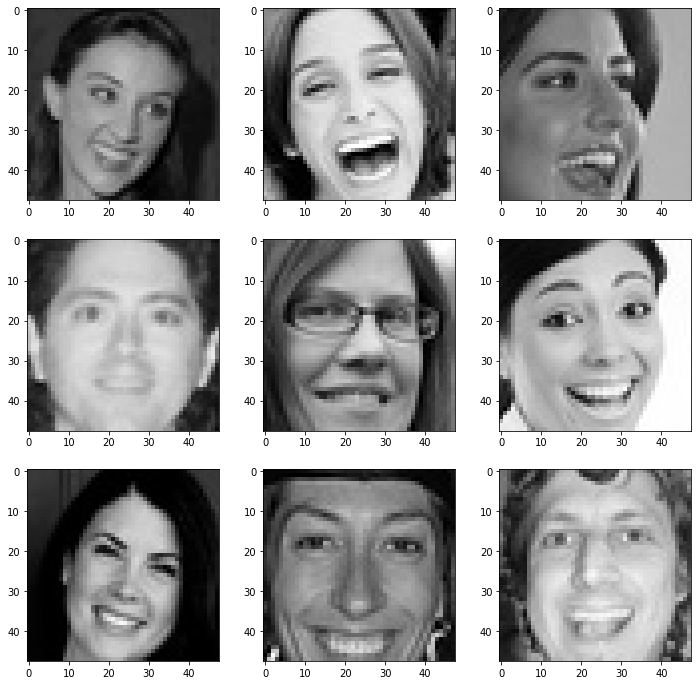

In [3]:
expression = "happy"
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + "happy")[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [4]:
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
#Creating ANN layers
no_of_classes = 7


model = Sequential()

#input layer and 1st hidden layer
model.add(Dense(64, input_shape=(48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#flatten layer
model.add(Flatten())

#2nd hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#3rd hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#4th hidden layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#5th hidden layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#6th hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#7th hidden layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#8th hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#output layer
model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-11-24 18:25:06.079603: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18874496  
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath = '/kaggle/working/ANN.h5',
                             monitor="accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 25

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [10]:
history = model.fit(x=train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )
#model.save_weights('/kaggle/working/ANN.h5')

2022-11-24 18:25:07.119716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
225/225 [==============================] - 155s 672ms/step - loss: 2.1234 - accuracy: 0.2076 - val_loss: 1.8196 - val_accuracy: 0.2592

Epoch 00001: accuracy improved from -inf to 0.20761, saving model to /kaggle/working/ANN.h5
Epoch 2/25
225/225 [==============================] - 90s 399ms/step - loss: 1.8349 - accuracy: 0.2705 - val_loss: 1.7146 - val_accuracy: 0.3067

Epoch 00002: accuracy improved from 0.20761 to 0.27048, saving model to /kaggle/working/ANN.h5
Epoch 3/25
225/225 [==============================] - 90s 398ms/step - loss: 1.7327 - accuracy: 0.3192 - val_loss: 1.6358 - val_accuracy: 0.3572

Epoch 00003: accuracy improved from 0.27048 to 0.31917, saving model to /kaggle/working/ANN.h5
Epoch 4/25
225/225 [==============================] - 90s 401ms/step - loss: 1.6836 - accuracy: 0.3399 - val_loss: 1.6186 - val_accuracy: 0.3678

Epoch 00004: accuracy improved from 0.31917 to 0.33987, saving model to /kaggle/working/ANN.h5
Epoch 5/25
225/225 [==================

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples = 7066 
Y_pred = model.predict(test_set, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 204    5   60  234  160  245   52]
 [  17   12   14   23   19   24    2]
 [ 102    2  160  215  147  272  120]
 [  85    0   50 1328  113  215   34]
 [  52    3   52  313  472  265   59]
 [  74    1   86  240  208  488   42]
 [  23    1   70  166   62   64  411]]
Classification Report
              precision    recall  f1-score   support

       angry       0.37      0.21      0.27       960
     disgust       0.50      0.11      0.18       111
        fear       0.33      0.16      0.21      1018
       happy       0.53      0.73      0.61      1825
     neutral       0.40      0.39      0.39      1216
         sad       0.31      0.43      0.36      1139
    surprise       0.57      0.52      0.54       797

    accuracy                           0.44      7066
   macro avg       0.43      0.36      0.37      7066
weighted avg       0.42      0.44      0.41      7066



Text(69.0, 0.5, 'Truth')

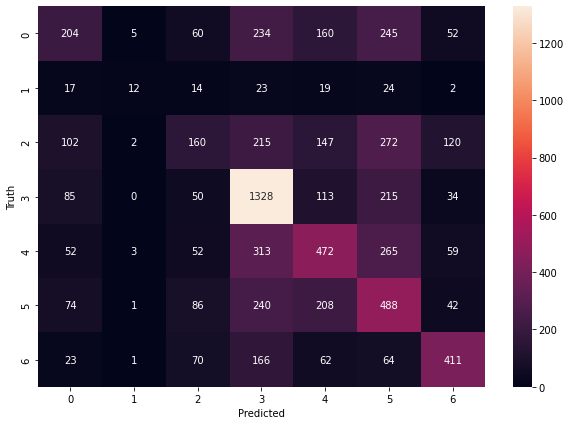

In [14]:
import seaborn as sn


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

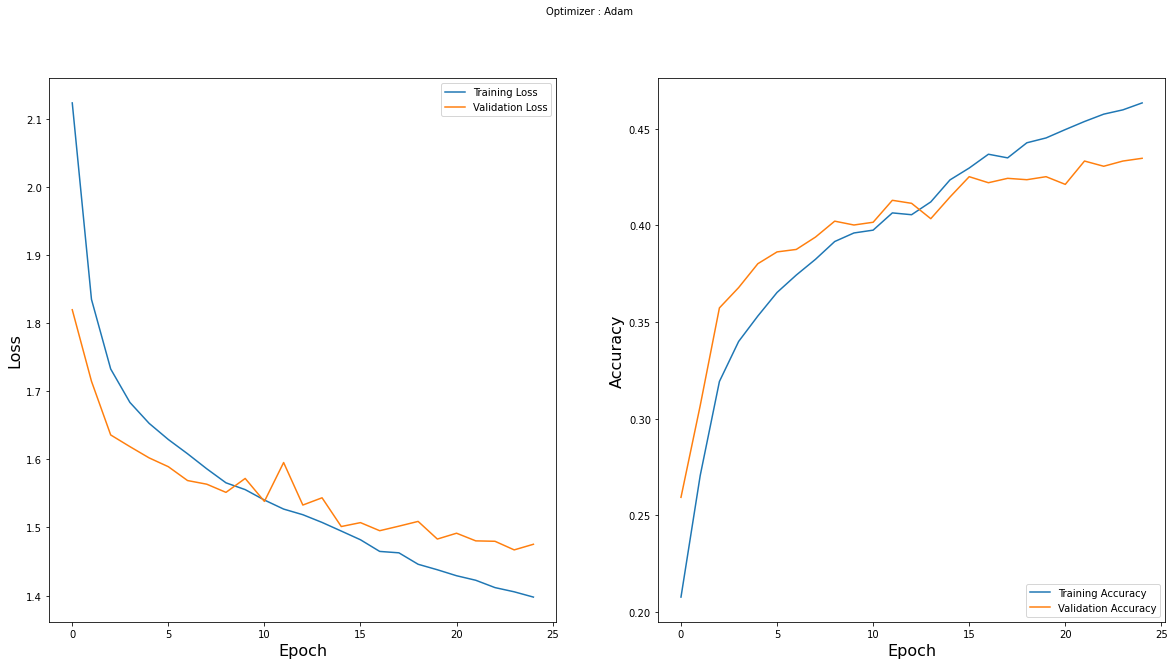

In [15]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
model.evaluate(test_set)

56/56 [==============================] - 8s 133ms/step - loss: 1.4757 - accuracy: 0.4352


[1.4756652116775513, 0.4351825714111328]

In [17]:
Y_pred = model.predict(test_set, num_of_test_samples // batch_size+1)
Y_pred.shape

(7066, 7)

In [36]:
target_names[np.argmax(Y_pred[0])]
for i in range(10):
    print(target_names[np.argmax(Y_pred[i])])

sad
angry
fear
sad
fear
angry
sad
sad
happy
fear
